# Remoción parcial de componentes
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
bla.
* Funciones de dibujo de redes: [dibujar_foster_serie](), [dibujar_foster_derivacion](), [dibujar_cauer_RC_RL]()
* Funciones de síntesis de dipolos: [cauer_RC](), [foster](), [foster_zRC2yRC]()
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


### Introducción

Hasta el momento se describieron las propiedades matemáticas que deben cumplir las funciones de excitación (FE), que se denominan *inmitancias*, para poder ser implementadas mediante redes eléctricas pasivas que constan de dos tipos de componentes: LC, RL y RC. En todos los casos, se plantearon métodos sistemáticos y canónicos (Foster y Cauer) para obtener dichas redes. En ambos casos, los componentes quedaron asociados a los **polos** de las FE y sus respectivos valores a los **residuos** en cada polo. Cada componente será **removido** de la FE para dar lugar a una red remanente más simple. Sea 

$$ F(s)=\frac{P(s)}{Q(s)} $$

una función de variable compleja $s$, siendo $F(s)$ real y positiva (FRP), podemos decir que para los tres casos antedichos, sus formas matemáticas pueden describirse como:

$$ F_{LC}(s)= \frac{k_0}{s} + k_\infty.s + \sum_{i=1}^N\frac{2.k_i.s}{s^2+\omega_i^2}$$

$$ F_{RC}(s)= \frac{k_0}{s} + k_K + \sum_{i=1}^N\frac{k_i}{s+\sigma_i} $$

$$ F_{RL}(s)= k_K + s. k_\infty + \sum_{i=1}^N\frac{k_i.s}{s+\sigma_i} $$

para cualquiera de los 3 casos, podemos plantear la remoción **total** de un polo, por ejemplo de una red LC, de las siguientes maneras:

$$ F_{21} = F_{LC} - \frac{k_0}{s} $$

$$ F_{22} = F_{LC} - k_\infty.s $$

$$ F_{21} = F_{LC} - \frac{2.k_i.s}{s^2+\omega_i^2} $$

Para los 3 casos resultan 3 inmitancias diferentes, todas del mismo origen LC que $F_{LC}(s)$ (no disipativo), dado que para las 3 remociones, a una red LC se le quitan o inductores, o capacitores, o tanques resonantes (capacitores e inductores). Como se ha dicho, los valores de cada componente dependen de $k_0$, $k_\infty$ y $2.k_i$. Lo que condicionará si la remoción es **total o parcial** es si la cantidad de residuo que se termina removiendo es un **valor real menor** al residuo en dicho polo, es decir

$$ F^p_{21} = F_{LC} - \frac{k^p_0}{s}; \quad \mathrm{Si} \enspace 0 < k^p_0 < k_0 $$

$$ F^p_{22} = F_{LC} - k^p_\infty.s ; \quad \mathrm{Si} \enspace 0 < k^p_\infty < k_0 $$

$$ F^p_{23} = F_{LC} - \frac{2.k^p_i.s}{s^2+\omega_i^2}; \quad \mathrm{Si} \enspace 0 < k^p_i < k_0  $$

Para cada caso, se remueve **parte de cada polo** con la finalidad de situar un **cero** de la inmitancia $ F^p_{2x} $ en una posición arbitraria $\omega_i$. Es decir que 

$$ F^p_{2x} \Big\vert_{s = j\omega_i}  = 0$$

Aprovechando esta igualdad podemos calcular los residuos parciales $k^p_x$

$$ k^p_0 = \left[ s . F_{LC} \right]_{s = j\omega_i} $$

$$ k^p_\infty = \left[ \frac{F_{LC}}{s} \right]_{s = j\omega_i} $$

$$ k^p_i = \left[ \frac{s^2+\omega_i^2}{s} . F_{LC} \right]_{s = j\omega_i} $$

De esta manera, se logra el objetivo de la remoción parcial de un polo, para asegurar que $ F^p_{2x} \Big\vert_{s = j\omega_i} = 0$. Se verá a continuación algunos casos donde esta técnica resulta útil.

### Ejemplo

Sea la admitancia de entrada 

$$ Y(s) = \frac{3s(s^2+ \frac{7}{3})}{(s^2+2)(s^2+5)} $$

de la siguiente red 

<div>
<center>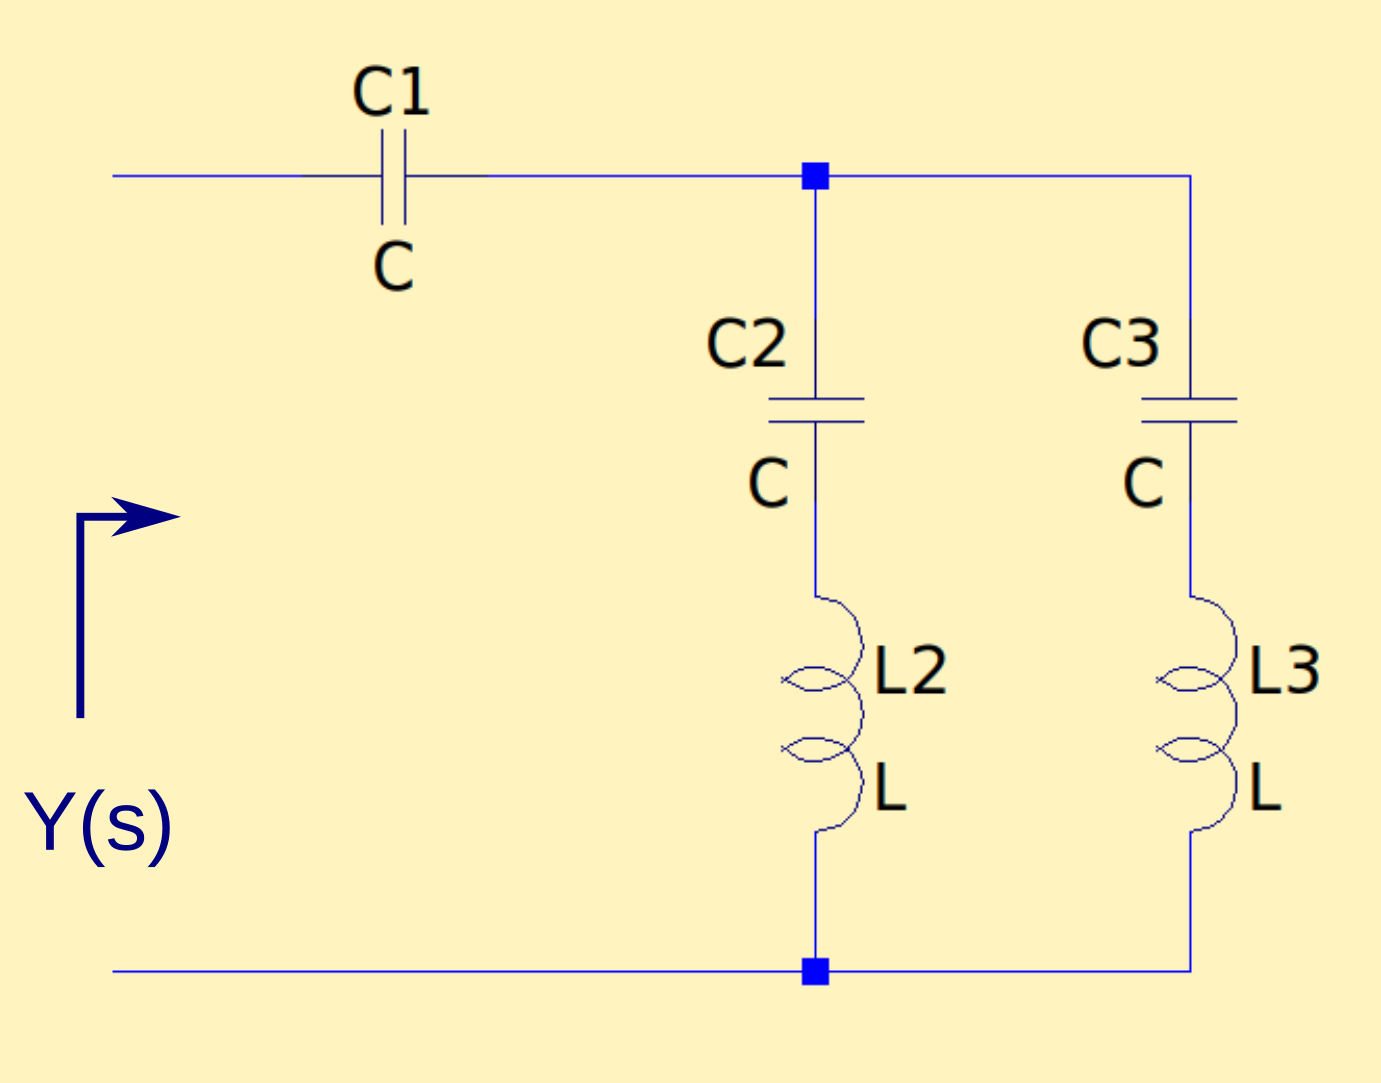</center>
</div>

Se desea calcular los valores de la red si $L_2$ y $C_2$ resuenan a 1 r/s

In [2]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie,  dibujar_tanque_derivacion,  dibujar_espacio_derivacion, Capacitor
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown


In [3]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

print_subtitle('Admitancia de entrada a la red')

print_latex(a_equal_b_latex_s('Y(s)', YY))


#### Admitancia de entrada a la red

<IPython.core.display.Math object>

In [3]:
# Se expande ZRC a la Foster
k0, koo, ki_wi, kk, ZRC_foster = foster(ZRC)

print_subtitle('Expansión Foster de $Z_{RC}$ ')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z_{RC}(s)', ZRC)[1:-1], ZRC_foster ))

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1 = \left[ \frac{1}{  k_k + s. k_\infty } \right]  = \
                                             \left[ \frac{1}{ \frac{\sigma_1}{k_1} + s. \frac{1}{k_i} } \right] = \
                                             \left[ k_k, k_\infty \right] = \
                                       \left[ \
                                             \left[ \frac{\sigma_1}{k_1}, \frac{1}{k_1} \right] \
                                       \right]', ki_wi ))


print_latex(a_equal_b_latex_s('k_k', kk))



#### Expansión Foster de $Z_{RC}$ 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Implementación circuital $Z_{RC}$ Foster serie

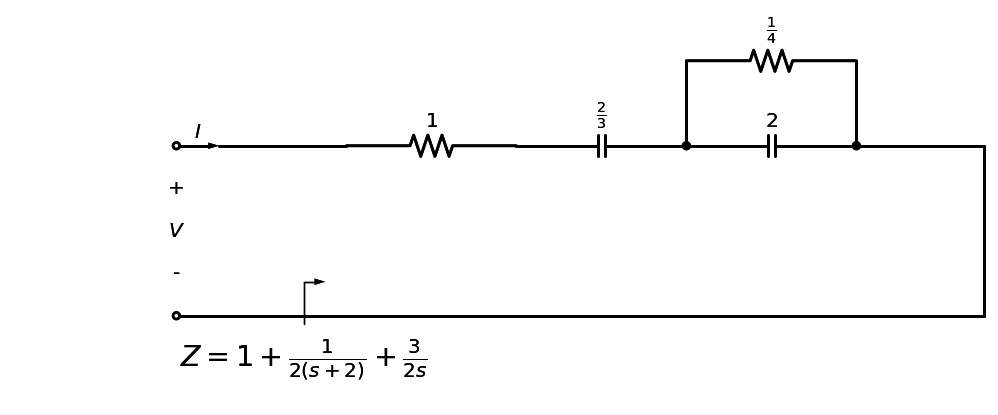

In [4]:
print_subtitle('Implementación circuital $Z_{RC}$ Foster serie')

# Tratamos a nuestra función imitancia como una Z
dibujar_foster_serie(k0 = k0, koo = koo, ki = ki_wi, kk = kk, z_exc = ZRC_foster)


In [5]:
# Se expande YRC a la Foster. Notar que se expande YRC/s, como si fuera ZRC. (Ver Kuo 331)
k0, koo, ki_wi, kk, YRC_foster = foster(YRC/s)

# Luego lo multiplicamos por s para obtener la YRC original.
k0, koo, ki_wi, kk, YRC_foster = foster_zRC2yRC(k0, koo, ki_wi, kk, YRC_foster)

print_subtitle('Expansión Foster de $Y_{RC}$ ')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y_{RC}(s)', YRC)[1:-1], YRC_foster ))

print_latex(a_equal_b_latex_s('k_\infty', koo))

print_latex(a_equal_b_latex_s(r'k_1 = \left[ \frac{1}{ \frac{k_0}{s} +  k_k } \right]  = \
                                             \left[ \frac{1}{ \frac{1}{s. \frac{k_1}{\sigma_1}} + \frac{1}{k_1} } \right] = \
                                             \left[ k_0, k_k \right] = \
                                       \left[ \
                                             \left[ \frac{\sigma_i}{k_i}, \frac{1}{k_i} \right] \
                                       \right]', ki_wi ))


print_latex(a_equal_b_latex_s('k_k', kk))



#### Expansión Foster de $Y_{RC}$ 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Implementación circuital $Y_{RC}$ Foster serie

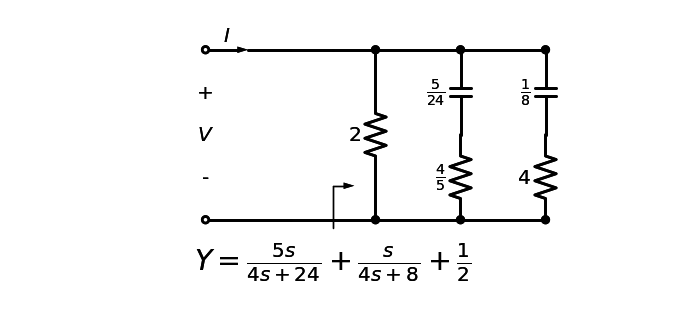

In [6]:
print_subtitle('Implementación circuital $Y_{RC}$ Foster serie')

# Recalculamos
k0, koo, ki_wi, kk, YRC_foster = foster(YRC/s)
k0, koo, ki_wi, kk, YRC_foster = foster_zRC2yRC(k0, koo, ki_wi, kk, YRC_foster)

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, kk, y_exc = YRC_foster)


### Implementación de  FE con inductores

Ahora presentamos las versiones equivalentes de las FE disipativas analizadas hasta ahora

#### Implementación circuital $Y_{RC}$ como $Z_{RL}$

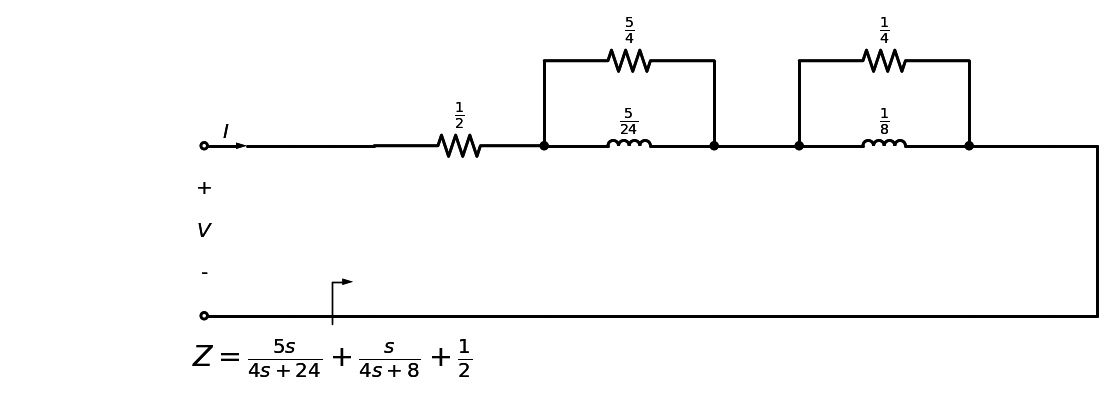

In [7]:
print_subtitle('Implementación circuital $Y_{RC}$ como $Z_{RL}$')

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_serie(k0, koo, ki_wi, kk, z_exc = YRC_foster)


#### Implementación circuital $Z_{RC}$ como $Y_{RL}$

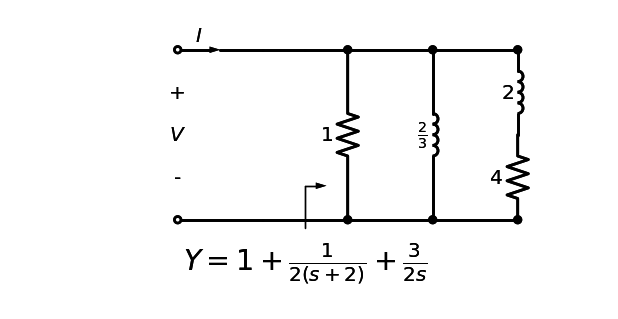

In [8]:
print_subtitle('Implementación circuital $Z_{RC}$ como $Y_{RL}$')

k0, koo, ki_wi, kk, ZRC_foster = foster(ZRC)

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, kk, y_exc = ZRC_foster)


### Expansión en fracciones continuas: Método de Cauer

Del mismo modo que el método de Foster se sutenta en la expansión en fracciones simples, el de Cauer consiste en la expansión en [fracciones continuas](https://en.wikipedia.org/wiki/Network_synthesis#Cauer_synthesis). En el caso de FE disipativas, se realizará la expansión mediante los residuos $k_0$, $k_\infty$ y $k_K$, dependiendo si se expande una $Z_{RC}$ o una $Y_{RC}$:

$$ Z_{RC}(s)= \frac{1}{s.C_1} + \frac{1}{ \frac{1}{R_1} + \frac{1}{ \frac{1}{s.C_2} + \cdots } } = 
         R_1 + \frac{1}{ s.C_1 + \frac{1}{ R_2 + \cdots } } $$

$$ Y_{RC}(s)= s.C_1 + \frac{1}{ R_1 + \frac{1}{ s.C_2 + \cdots } } = 
         \frac{1}{R_1} + \frac{1}{ s.C_1 + \frac{1}{ \frac{1}{R_2} + \cdots } } $$

se ve claramente como sendas funciones de inmitancia, se corresponden con 2 redes diferentes, dependiendo dónde se realicen las remociones. Se darán ejemplos en los siguientes paneles.



## Cauer 1: remociones en $\infty$

Se comienza con la primera forma del método, es decir cuando se realizan remociones de los residuos en infinito.

#### Implementación escalera de $Z_{RC}$ e $Y_{RL}$

<IPython.core.display.Math object>

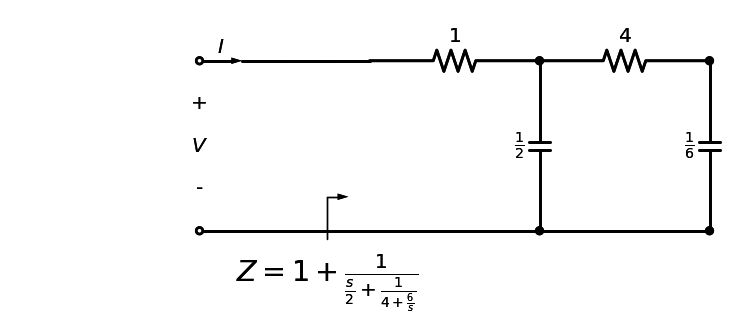

<IPython.core.display.Math object>

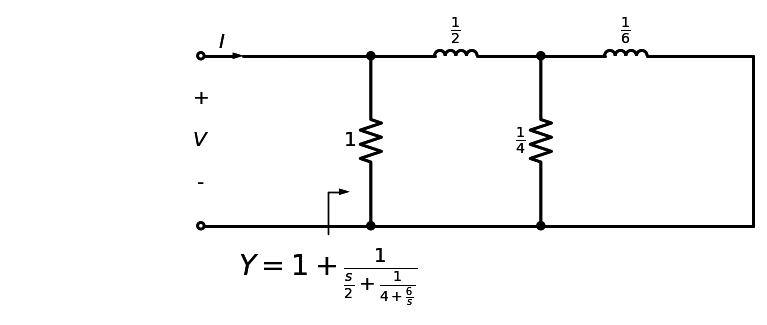

In [9]:
from pytc2.sintesis_dipolo import cauer_RC
from pytc2.dibujar import dibujar_cauer_RC_RL

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, ZRC_cauer_oo, rem = cauer_RC(ZRC, remover_en_inf=True)

print_subtitle('Implementación escalera de $Z_{RC}$ e $Y_{RL}$')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Z_{RC}(s)', ZRC)[1:-1], ZRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_RC_RL(koo, z_exc = ZRC_cauer_oo)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Y_{RL}(s)', ZRC)[1:-1], ZRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_RC_RL(koo, y_exc = ZRC_cauer_oo)



Se observa, como es de esperarse, que interpretar la inmitancia como impedancia o admitancia utilizando Cauer 1, da lugar a redes **duales**. Sin embargo en ambos casos se observan transferencias pasabajo (respecto a un posible puerto de salida en el extremo derecho de la red), ya que se obtienen inductores en serie y capacitores en derivación.

## Cauer 2: remociones en 0 o DC

Repetimos ahora para remociones de los residuos en 0 Hz, obtendremos dos redes también duales.

#### Implementación escalera de $Y_{RC}$ y $Z_{RL}$

<IPython.core.display.Math object>

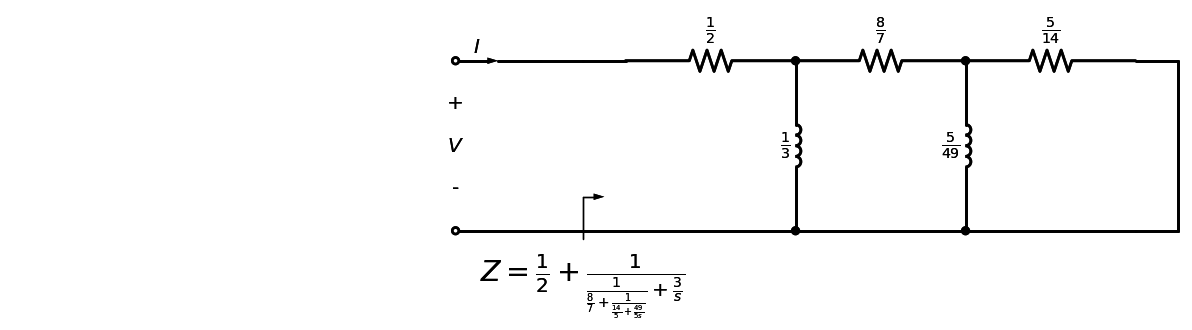

<IPython.core.display.Math object>

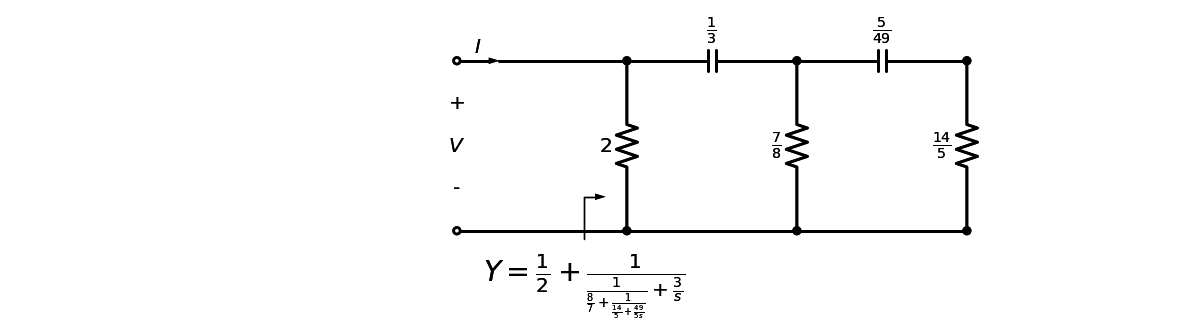

In [10]:

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, YRC_cauer_oo, rem = cauer_RC(YRC, remover_en_inf=False)

print_subtitle('Implementación escalera de $Y_{RC}$ y $Z_{RL}$')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Y_{RC}(s)', YRC)[1:-1], YRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_RC_RL(koo, z_exc = YRC_cauer_oo)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Z_{RL}(s)', YRC)[1:-1], YRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_RC_RL(koo, y_exc = YRC_cauer_oo)


Ambas redes duales, tienen características en común como ser que ambas tienen capacitores en serie e inductores en derivación. Esto contrasta con las redes halladas mediante Cauer 1, donde observamos lo contrario: inductores en serie y capacitores en derivación. Está claro que Cauer 1 da lugar a redes que, en caso **que imaginemos un puerto de salida en el extremo derecho de la red**, serían filtros **pasabajo**, mientras que sintetizar una red mediante Cauer 2 da lugar a una red escalera **pasa-altos**.
